## Import Packages

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split, KFold
import nltk
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import gensim
from nltk.tokenize import word_tokenize

## Loading data

In [2]:
train = pd.read_csv('/kaggle/input/feedback-prize-english-language-learning/train.csv')
test = pd.read_csv('/kaggle/input/580data/test_balanced.csv')
#test_extend = pd.read_csv('/kaggle/input/580data/test.csv') ## read the test data with add some books and writing of other esl students

In [3]:
train.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


In [4]:
text_list = []
for i in train.full_text:
    j = word_tokenize(i)
    text_list.append(j)

In [5]:
len(text_list)

3911

In [6]:
model = gensim.models.Word2Vec(text_list, vector_size=1000, window=10,min_count=1)
#model.wv.key_to_index

In [7]:
vector_dict = {}
for word in model.wv.index_to_key: 
    vector_dict[word] = model.wv.get_vector(word)

vec_df = pd.DataFrame(vector_dict).T
vec_df = vec_df.iloc[1:, :]
vec_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
.,0.739164,-0.535412,0.986124,0.062805,0.082067,-0.154729,0.485892,0.690441,0.000125,-0.204641,...,0.121088,-0.114892,0.472390,0.129143,-0.280739,-0.067589,-0.153207,-0.215494,0.091895,0.362174
",",0.547737,-0.264642,0.308442,0.511418,0.333373,0.176254,0.656564,0.348629,0.051031,0.453075,...,0.760017,-0.158681,0.229813,-0.083648,-0.295299,0.328076,0.328363,0.066462,0.055872,-0.215330
the,0.081047,0.111827,0.026768,0.061925,-0.168278,-0.087517,-0.101807,0.568282,0.470330,-0.266333,...,0.708942,-0.293191,-0.621489,-0.604323,0.215248,0.347498,-0.456665,0.396134,0.102132,-0.251482
and,-0.304504,-0.284071,0.021488,0.065433,0.449613,-0.189555,0.310707,-0.202307,0.403610,-0.085572,...,0.505559,-0.352985,0.067201,-0.188589,0.127739,-0.195793,-0.179454,0.350805,0.012368,0.133643
you,0.211296,-1.145591,0.155732,0.805547,0.158544,-0.806338,0.139332,-0.344212,-0.141070,0.764448,...,0.373784,-0.455006,1.446284,1.272681,0.416405,0.850561,-0.583693,-1.543315,0.342421,-1.039317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
undertan,0.009492,-0.002417,0.006340,0.004097,-0.003304,0.002718,0.001119,0.010979,-0.002854,-0.002968,...,0.003541,-0.001596,-0.000719,0.000410,0.000154,0.000422,0.003188,-0.000329,0.001509,-0.000085
Latinos,0.008353,0.003518,0.006675,0.001396,-0.001297,0.000545,0.004982,0.007358,-0.006995,-0.002522,...,0.001122,-0.004943,0.005751,-0.005964,0.005594,0.002755,0.003858,-0.005433,-0.005453,-0.006032
doble,0.014793,-0.005711,0.001134,-0.000686,0.002622,0.001010,0.001907,0.004152,0.001917,0.000933,...,-0.000514,0.005280,-0.002595,0.003581,-0.000838,-0.002564,0.010002,-0.009672,0.009125,-0.001168
neutral,0.004245,0.005573,0.012797,-0.000542,-0.005204,0.004181,0.001235,0.004600,-0.007776,0.000621,...,-0.005372,0.004570,0.016291,0.001430,-0.001290,0.001045,0.000651,-0.013894,-0.006272,-0.009140


### K-Fold

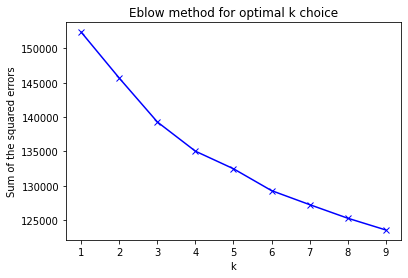

In [8]:
dict = []
# Try k for different values
##find the best k value
r = range(1, 10)
for k in r:
    #print(k)
    k_means = KMeans(n_clusters=k)
    kmean_model = k_means.fit(vec_df)
    dict.append(k_means.inertia_)
plt.plot(r, dict, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of the squared errors')
plt.title('Eblow method for optimal k choice')
plt.show()

## Train data Preprocessing

In [9]:
vocabulary_size = 3200
use_k_fold = True
target_columns = ["cohesion", "syntax", "vocabulary", "phraseology", "grammar", "conventions"]

In [10]:
train["text"] = train["full_text"].apply(lambda sentence: " ". join(nltk.word_tokenize(sentence.lower())))
test["text"] = test["full_text"].apply(lambda sentence: " ". join(nltk.word_tokenize(sentence.lower())))
#test_extend["text"] = test_extend["full_text"].apply(lambda sentence: " ". join(nltk.word_tokenize(sentence.lower())))
vectorizor = keras.layers.TextVectorization(
    max_tokens=vocabulary_size, 
    output_mode="tf-idf", 
    ngrams=2
)
vectorizor.adapt(list(train["text"]) + list(test["text"]))
#vectorizor.adapt(list(train["text"]) + list(test_extend["text"]))

2022-11-30 03:02:50.710780: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-11-30 03:02:50.984667: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


## Building Model

In [11]:
lr=0.1
batch_size=32
embedding_space_dim=200
epochs=40

In [12]:
import keras
from tensorflow.keras import optimizers
def build_model():
    model = keras.models.Sequential()
    model.add(keras.Input(shape=(), dtype="string"))
    model.add(vectorizor)
    #model.add(keras.layers.Dense(128, activation='swish'))
    model.add(keras.layers.Dense(64, activation='softmax'))  ## change the layer dense to 32
    model.add(keras.layers.Dense(32, activation='softmax'))
    #model.add(keras.layers.Dense(16, activation='swish'))
    model.add(keras.layers.Dense(6))
    #model.add(keras.layers.Dropout(0.05))
    rmse = tf.keras.metrics.RootMeanSquaredError(name="rmse")
    model.compile(loss="mse", optimizer="adam", metrics=[rmse])
    return model

In [13]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization (TextVect (None, 3200)              1         
_________________________________________________________________
dense (Dense)                (None, 64)                204864    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
Total params: 207,143
Trainable params: 207,142
Non-trainable params: 1
_________________________________________________________________


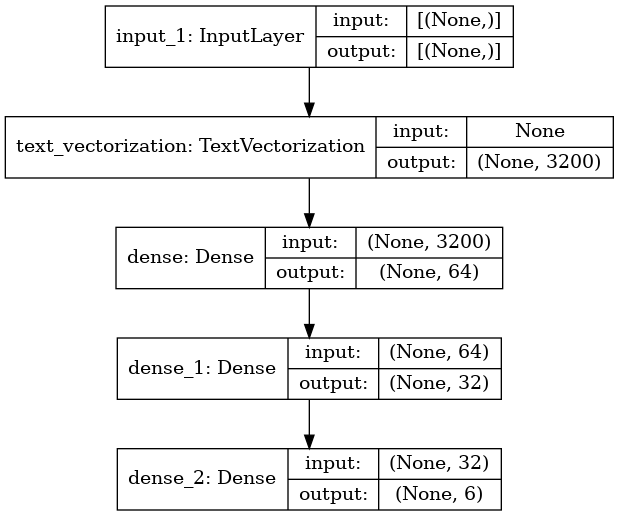

In [14]:
from tensorflow.keras.utils import plot_model
#keras.utils.plot_model(model, show_shapes=True)
plot_model(model, show_shapes=True)

## Training models

In [15]:
keras.backend.clear_session()
kfold = KFold(n_splits=5, shuffle=True, random_state=42) ## as the k means cluster results, we choose n_splits = 5
models = []
all_rmse_history = []
for i, (train_set, val_set) in enumerate(kfold.split(train)):
    x_train = train.iloc[train_set]["text"]
    y_train = train.iloc[train_set][target_columns]
    x_val = train.iloc[val_set]["text"]
    y_val = train.iloc[val_set][target_columns]
    model = build_model()
    rmse = tf.keras.metrics.RootMeanSquaredError(name="rmse")
    early_stop = keras.callbacks.EarlyStopping(monitor="val_rmse", mode="min", patience=5)
    model.compile(loss="mse", optimizer="adam", metrics=[rmse])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,validation_data=(x_val, y_val),callbacks=[early_stop])
    result = model.evaluate(x_val, y_val)
    print("Loss:", result[0], "RMSE:", result[1])
    all_rmse_history.append(result[1])
    models.append(model) 
    if not use_k_fold:
        break
print(f"Mean RMSE:{np.mean(all_rmse_history)}")

Epoch 1/40
98/98 [==============================] - 3s 16ms/step - loss: 9.3340 - rmse: 3.0552 - val_loss: 8.6610 - val_rmse: 2.9430
Epoch 2/40
98/98 [==============================] - 1s 13ms/step - loss: 8.1418 - rmse: 2.8534 - val_loss: 7.5268 - val_rmse: 2.7435
Epoch 3/40
98/98 [==============================] - 1s 13ms/step - loss: 7.0521 - rmse: 2.6556 - val_loss: 6.4860 - val_rmse: 2.5468
Epoch 4/40
98/98 [==============================] - 1s 13ms/step - loss: 6.0505 - rmse: 2.4598 - val_loss: 5.5350 - val_rmse: 2.3527
Epoch 5/40
98/98 [==============================] - 1s 13ms/step - loss: 5.1393 - rmse: 2.2670 - val_loss: 4.6731 - val_rmse: 2.1617
Epoch 6/40
98/98 [==============================] - 1s 13ms/step - loss: 4.3221 - rmse: 2.0790 - val_loss: 3.9069 - val_rmse: 1.9766
Epoch 7/40
98/98 [==============================] - 1s 13ms/step - loss: 3.5945 - rmse: 1.8959 - val_loss: 3.2240 - val_rmse: 1.7956
Epoch 8/40
98/98 [==============================] - 1s 13ms/step - lo

## Predict for Test dataset

In [16]:
preds = []
for model in models:
    preds.append(model.predict(test["text"]))
pred = np.mean(preds, axis=0)
output = pd.DataFrame({
    "text_id": test["text_id"]
})
#print(output)
for i in range(len(target_columns)):
    column = target_columns[i]
    #print(column)
    output[column] = pred[:,i]
pred = np.mean(preds, axis=0)
output.to_csv("output.csv", index=False)

In [17]:
#test

In [31]:
y_pred = output.iloc[:,1:]

In [29]:
y_real = test.iloc[:,3:9]

In [32]:
import math
row = 783
col = 6
total = 0
sum_total = 0
for i in range(col):
    for j in range(row):
        total += (y_real.iloc[j][i] - y_pred.iloc[j][i])**2
    total /= row
    sum_total += math.sqrt(total)
    total = 0
sum_total/= col
sum_total

0.5101113137949181

### Test for test set with students and famous book

In [19]:
"""
pred1 = []
for model in models:
    pred1.append(model.predict(test_extend["text"]))
predict = np.mean(pred1, axis=0)
output_test = pd.DataFrame({
    "text_id": test_extend["text_id"]
})
for i in range(len(target_columns)):
    columns = target_columns[i]
    #print(column)
    output_test[columns] = predict[:,i]
predict = np.mean(pred1, axis=0)
output_test.to_csv("output_test.csv", index=False)
"""


'\npred1 = []\nfor model in models:\n    pred1.append(model.predict(test_extend["text"]))\npredict = np.mean(pred1, axis=0)\noutput_test = pd.DataFrame({\n    "text_id": test_extend["text_id"]\n})\nfor i in range(len(target_columns)):\n    columns = target_columns[i]\n    #print(column)\n    output_test[columns] = predict[:,i]\npredict = np.mean(pred1, axis=0)\noutput_test.to_csv("output_test.csv", index=False)\n'

In [20]:
#output_test